# 🛡️ UNSW-NB15 Intrusion Detection Dataset - Exploratory Data Analysis
This notebook performs a comprehensive analysis of the UNSW-NB15 dataset using the provided feature descriptions and labeled network data.

In [ ]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style='whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 📂 Load Dataset
df = pd.read_csv("/content/drive/MyDrive/UNSW-NB15_1.csv")
features = pd.read_csv("/content/drive/MyDrive/NUSW-NB15_features.csv", encoding='latin-1') # Or try 'cp1252', 'ISO-8859-1'

<ipython-input-2-d02b1fc76b05>:2: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/UNSW-NB15_1.csv")


## 📋 Dataset Overview

In [ ]:
df.head()

,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0


In [ ]:
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (700000, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 49 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   59.166.0.0     700000 non-null  object 
 1   1390           700000 non-null  object 
 2   149.171.126.6  700000 non-null  object 
 3   53             700000 non-null  object 
 4   udp            700000 non-null  object 
 5   CON            700000 non-null  object 
 6   0.001055       700000 non-null  float64
 7   132            700000 non-null  int64  
 8   164            700000 non-null  int64  
 9   31             700000 non-null  int64  
 10  29             700000 non-null  int64  
 11  0              700000 non-null  int64  
 12  0.1            700000 non-null  int64  
 13  dns            700000 non-null  object 
 14  500473.9375    700000 non-null  float64
 15  621800.9375    700000 non-null  float64
 16  2              700000 non-null  int64  
 17  2

## 📑 Feature Descriptions
Each column in the dataset corresponds to a feature described in the NUSW-NB15_features.csv file.

In [ ]:
features.columns = ["Index", "Feature Name", "Description", "Type"]
features.head(10)

,Index,Feature Name,Description,Type
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


## ❓ Missing Value Analysis

In [ ]:
missing = df.isnull().sum()
missing[missing > 0]

,0
Unnamed: 47,677785


## 🎯 Target Variable Distribution
- `label` = 0 for normal traffic
- `label` = 1 for attack traffic

In [ ]:
features['Feature Name']

,Feature Name
0,srcip
1,sport
2,dstip
3,dsport
4,proto
5,state
6,dur
7,sbytes
8,dbytes
9,sttl


In [ ]:
# Extract feature names from the 'Feature Name' column (rows 0–47)
feature_names = features["Feature Name"].tolist()  # This gives you the first 47 features

# Add the 'label' column manually
column_names = feature_names

# Load the main data with no header
# df = pd.read_csv("UNSW-NB15_1.csv", header=None)

# Check that the column counts match
print("Dataset columns:", df.shape[1])
print("Column names length:", len(column_names))

# Assign column names if lengths match
if df.shape[1] == len(column_names):
    df.columns = column_names
    print("✅ Column names assigned successfully.")
else:
    print("❌ Column length mismatch. Check the files again.")

# Preview the result
df.head()


Dataset columns: 49
Column names length: 49
✅ Column names assigned successfully.


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0


In [ ]:
# drop the Unnamed: 47 column
df.drop('attack_cat', axis=1, inplace=True)

In [ ]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,0,12,8,1,2,2,1,1,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,0,6,9,1,1,1,1,1,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,0,7,9,1,1,1,1,1,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,0,2,4,2,3,1,1,2,0


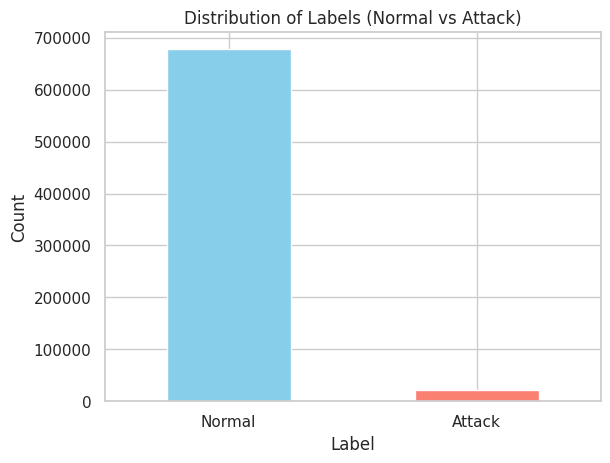

In [ ]:
df['Label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Labels (Normal vs Attack)")
plt.xticks([0, 1], ['Normal', 'Attack'], rotation=0)
plt.ylabel("Count")
plt.show()

## 🧮 Statistical Summary of Numeric Features

In [ ]:
df.describe().T.sort_values("std", ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
dtcpb,700000.0,1.515375e+09,1.430194e+09,0.000000e+00,0.000000e+00,1.249216e+09,2.774465e+09,4.294931e+09
stcpb,700000.0,1.514223e+09,1.428408e+09,0.000000e+00,0.000000e+00,1.249985e+09,2.768853e+09,4.294950e+09
Sload,700000.0,6.024278e+06,5.181495e+07,0.000000e+00,7.885879e+04,5.362718e+05,1.078489e+06,5.268000e+09
Dload,700000.0,3.011026e+06,4.499955e+06,0.000000e+00,7.640435e+04,6.686759e+05,3.856223e+06,1.287619e+08
dbytes,700000.0,4.833044e+04,1.860517e+05,0.000000e+00,3.040000e+02,3.380000e+03,2.243200e+04,1.465542e+07
res_bdy_len,700000.0,4.795690e+03,4.866209e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.063451e+06
sbytes,700000.0,5.009643e+03,4.489871e+04,0.000000e+00,4.240000e+02,2.024000e+03,3.806000e+03,1.367739e+07
Sjit,700000.0,1.749235e+03,1.549505e+04,0.000000e+00,0.000000e+00,2.979901e+01,7.399301e+02,1.149892e+06
Ltime,700000.0,1.421941e+09,7.914668e+03,1.421927e+09,1.421934e+09,1.421942e+09,1.421947e+09,1.421956e+09
Stime,700000.0,1.421941e+09,7.914417e+03,1.421927e+09,1.421934e+09,1.421942e+09,1.421947e+09,1.421956e+09


## 🔗 Correlation Matrix of Top Features

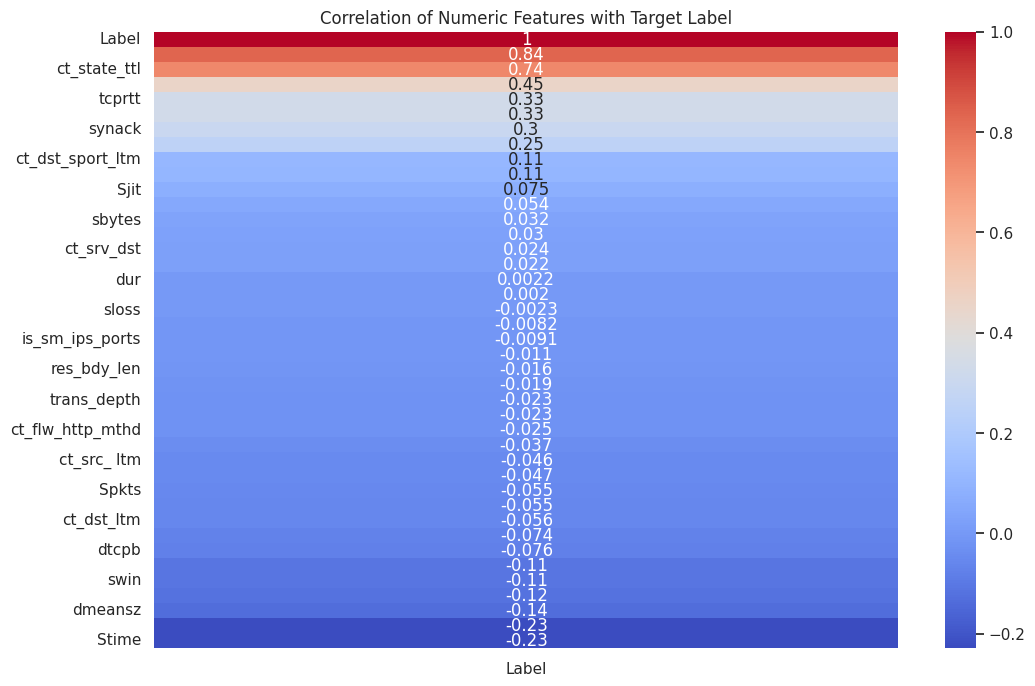

In [ ]:
# Filter numeric columns only
numeric_df = df.select_dtypes(include=['number'])
# Calculate correlations
corr = numeric_df.corr()

# Plot heatmap of correlation with the label
plt.figure(figsize=(12, 8))
sns.heatmap(corr["Label"].sort_values(ascending=False).to_frame(), annot=True, cmap="coolwarm")
plt.title("Correlation of Numeric Features with Target Label")
plt.show()


## 🔁 Encoding Categorical Features
Identify and encode non-numeric fields using Label Encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Convert all categorical columns to string (important!)
df[categorical_cols] = df[categorical_cols].astype(str)

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for inverse transform if needed later

print("✅ Categorical features encoded successfully.")


✅ Categorical features encoded successfully.


## 📉 Feature Importance using Random Forest (Preview)

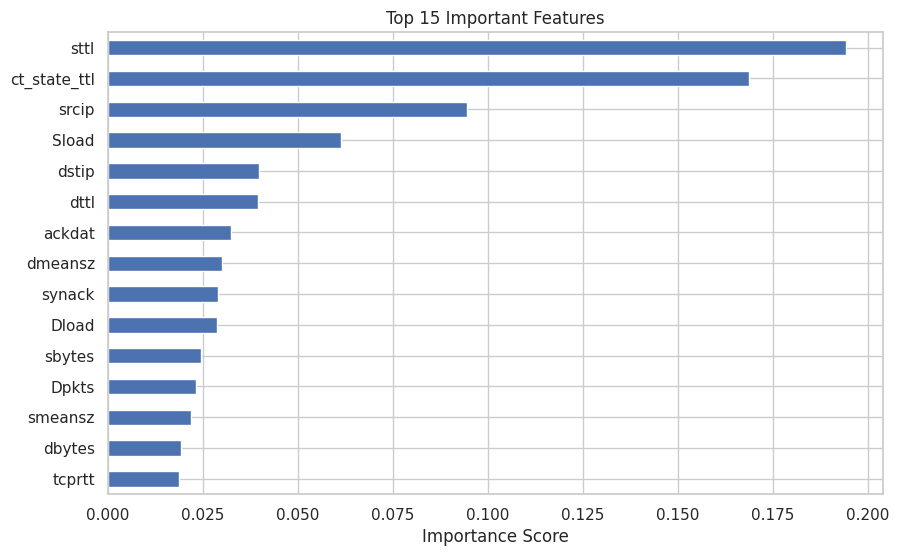

In [ ]:
X = df.drop(columns=["Label"])
y = df["Label"]
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(df.drop('Label', axis=1), df['Label'])

In [ ]:
mi_scores

array([0.13629717, 0.03874122, 0.13706791, 0.05469084, 0.10600711,
       0.12686927, 0.0744862 , 0.11512811, 0.09459287, 0.22477191,
       0.20160666, 0.02846326, 0.02645027, 0.01041748, 0.08827518,
       0.07798029, 0.03527542, 0.0683914 , 0.14153459, 0.14116895,
       0.00899491, 0.00930568, 0.07408247, 0.08813424, 0.00323079,
       0.00558151, 0.03323376, 0.02962014, 0.05460324, 0.05501861,
       0.03936358, 0.07561849, 0.06210124, 0.06027592, 0.0613638 ,
       0.00040952, 0.12070739, 0.00184842, 0.00069859, 0.00043407,
       0.01162664, 0.01523655, 0.02404593, 0.0160765 , 0.07903286,
       0.09808882, 0.03032103])

✅ Compute Percentage Distribution

In [ ]:
label_dist = df['Label'].value_counts(normalize=True) * 100
print("Percentage of records by class:")
print(label_dist.round(2).astype(str) + "%")


Percentage of records by class:
Label
0    96.83%
1     3.17%
Name: proportion, dtype: object


Setup: Define Features and Target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Drop label column from features
X = df.drop(columns=['Label'])
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 560000
Testing samples: 140000


Train a Random Forest Model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]


Evaluation: Classification Report and Confusion Matrix

🔍 Classification Report:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    135557
      Attack       0.97      0.99      0.98      4443

    accuracy                           1.00    140000
   macro avg       0.99      0.99      0.99    140000
weighted avg       1.00      1.00      1.00    140000



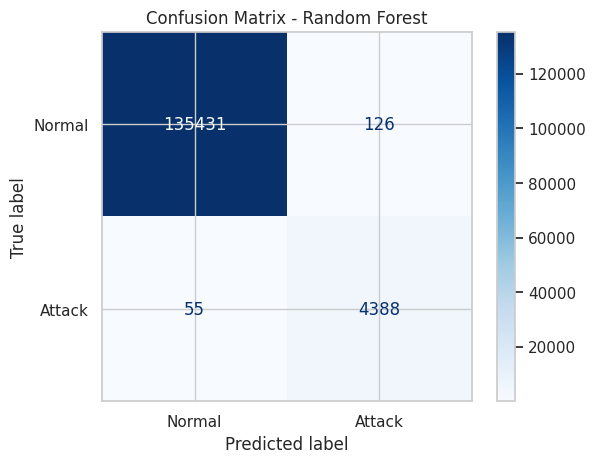

In [ ]:
# Classification Report
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Normal", "Attack"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Attack"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Evaluation: ROC-AUC Curve

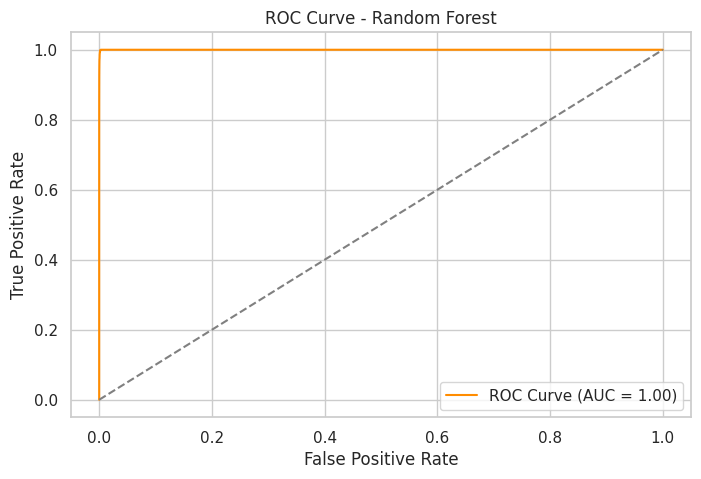

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()


PCA: Principal Component Analysis

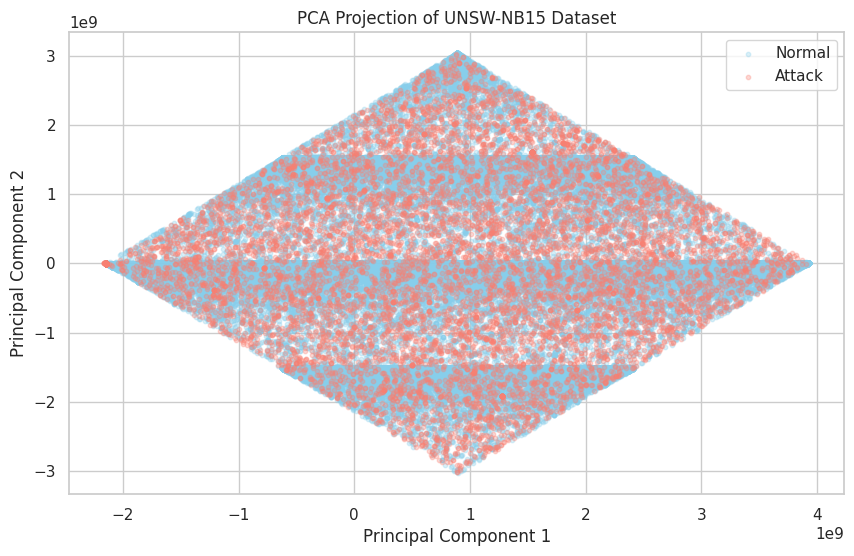

In [ ]:
from sklearn.decomposition import PCA

# Run PCA on the full dataset (only numeric features)
X_numeric = df.drop(columns=['Label'])
y = df['Label']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.3, label="Normal", s=10, c='skyblue')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.3, label="Attack", s=10, c='salmon')
plt.title("PCA Projection of UNSW-NB15 Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


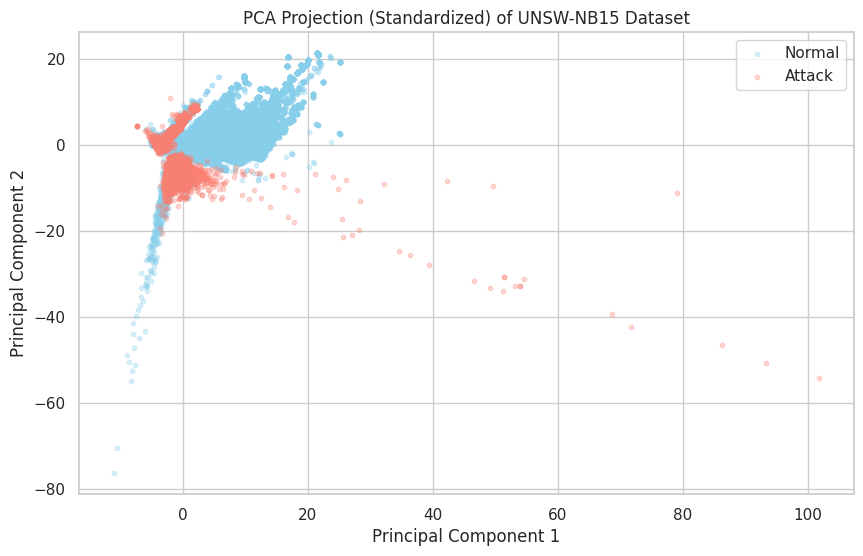

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot again
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.3, label="Normal", s=10, c='skyblue')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.3, label="Attack", s=10, c='salmon')
plt.title("PCA Projection (Standardized) of UNSW-NB15 Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Make sure you split BEFORE fitting!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", scores)
print("Mean AUC:", scores.mean())


Cross-validated AUC scores: [0.99075663 0.99018732 0.99966123 0.99943387 0.9832126 ]
Mean AUC: 0.9926503306932528


t-SNE: t-distributed Stochastic Neighbor Embedding

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


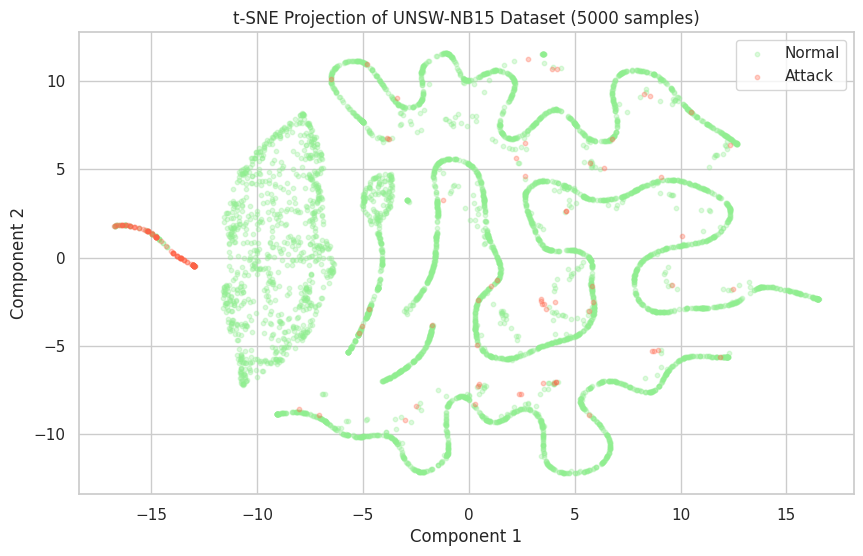

In [ ]:
from sklearn.manifold import TSNE

# Run t-SNE on a subset for performance (optional: 5000 samples)
X_sample = X_numeric.sample(n=5000, random_state=42)
y_sample = y.loc[X_sample.index]

tsne = TSNE(n_components=2, perplexity=40, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[y_sample==0, 0], X_tsne[y_sample==0, 1], alpha=0.3, label="Normal", s=10, c='lightgreen')
plt.scatter(X_tsne[y_sample==1, 0], X_tsne[y_sample==1, 1], alpha=0.3, label="Attack", s=10, c='tomato')
plt.title("t-SNE Projection of UNSW-NB15 Dataset (5000 samples)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()
